# Economic Analysis of the Turkish Economy Using Data

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
html_text=requests.get('https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Statistics/Inflation+Data/Consumer+Prices').text

In [3]:
soup=BeautifulSoup(html_text,'lxml')

In [4]:
list1=list()
list2=list()
list3=list()
list4=list()
inflation=soup.find_all('div',class_='tcmb-content type-prg')
for i in inflation:
    i1=i.text.split()
    list1.append(i1)   
for var in list1:
    for v in var:
        try:
            float(v)
            list2.append(v)
        except:
            list4.append(v)
number=0
for rate in list2:
    number=number+1
    if number%2!=0:
        list3.append(rate)
        
# Data Pre-Processing for Inflation data
df1=pd.DataFrame(list3[:60])
df2=pd.DataFrame(list4[32:92])
df1.rename(columns={0:'Inflation Rate'},inplace=True)
df2.rename(columns={0:'Month'},inplace=True)
df1.index.names = ['S.No']
df2.index.names = ['S.No']
df=df2.join(df1,how='inner')
df3=pd.to_numeric(df['Inflation Rate'])
df=df2.join(df3,how='inner')
df=df.iloc[::-1].reset_index(drop=True)
df=df.set_index('Month',drop=True)

In [5]:
# Data Pre-Processing for Exchange Rate data
df2=df2.iloc[::-1].reset_index(drop=True)
data=pd.read_csv('CCUSMA02TRM618N.csv')
data=data.drop(data.index[0])
data=data.reset_index(drop=True)
data=data.rename(columns={'CCUSMA02TRM618N':'Exchange Rate'})
data=df2.join(data,how='inner')
data=data.drop(columns=['DATE'])
data=data.set_index('Month',drop=True)
df=df.join(data,how='inner')

In [9]:
# Data Pre-Processing for Unemployment Rate data
data_ue=pd.read_csv('LRHUTTTTTRM156S.csv')
data_ue=data_ue.rename(columns={'LRHUTTTTTRM156S':'Unemployment Rate'})
data_ue.loc[len(data_ue.index)] = ['2021-12-01', 11.2]
data_ue=df2.join(data_ue,how='inner')
data_ue=data_ue.drop(columns=['DATE'])
data_ue=data_ue.set_index('Month',drop=True)
df=df.join(data_ue,how='inner')

In [15]:
# Data Pre-Processing for Exports data
data_export=pd.read_csv('XTEXVA01TRM667S.csv')
data_export=data_export.rename(columns={'XTEXVA01TRM667S':'Exports'})
data_export.loc[len(data_export.index)] = ['2021-12-01', 20171046300]
data_export=df2.join(data_export,how='inner')
data_export=data_export.drop(columns=['DATE'])
data_export=data_export.set_index('Month',drop=True)
df=df.join(data_export,how='inner')

## Plot of Inflation Rate

Text(0.5, 1.0, "Monthly Inflation Rate of Turkey from Jan'17")

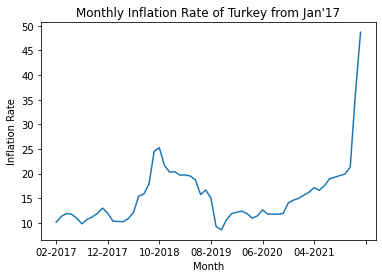

In [23]:
df['Inflation Rate'].plot()
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title("Monthly Inflation Rate of Turkey from Jan'17")

## Plot of Exchange Rate

Text(0.5, 1.0, "Exchange Rate of $1 for Turkish Lira from Jan'17")

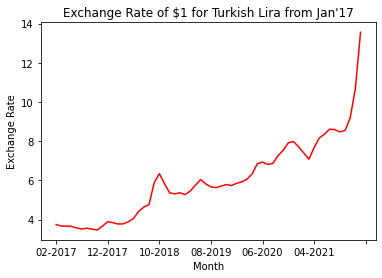

In [24]:
df['Exchange Rate'].plot(color='red')
plt.xlabel('Month')
plt.ylabel('Exchange Rate')
plt.title("Exchange Rate of $1 for Turkish Lira from Jan'17")

## Plot of Unemployment Rate

Text(0.5, 1.0, "Unemployment Rate of Turkey from Jan'17")

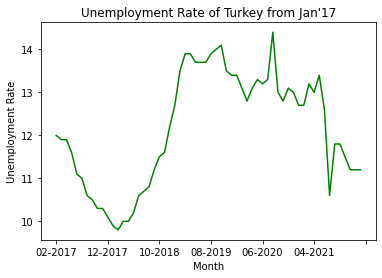

In [25]:
df['Unemployment Rate'].plot(color='green')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title("Unemployment Rate of Turkey from Jan'17")

## Plot of Exports

Text(0.5, 1.0, "Exports of Turkey from Jan'17")

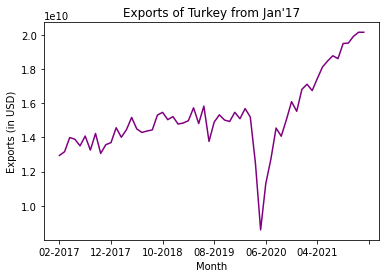

In [26]:
df['Exports'].plot(color='purple')
plt.xlabel('Month')
plt.ylabel('Exports (in USD)')
plt.title("Exports of Turkey from Jan'17")

In [27]:
df.corr()

,Inflation Rate,Exchange Rate,Unemployment Rate,Exports
Inflation Rate,1.000000,0.684434,-0.064273,0.617813
Exchange Rate,0.684434,1.000000,0.303984,0.697986
Unemployment Rate,-0.064273,0.303984,1.000000,-0.028846
Exports,0.617813,0.697986,-0.028846,1.000000


## Inflation vs Unemployment Rate Regression Plot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment Rate', ylabel='Inflation Rate'>

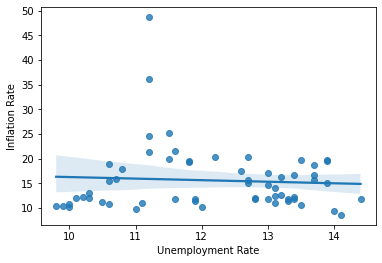

In [28]:
x=df['Inflation Rate']
y=df['Unemployment Rate']
sns.regplot(y,x)

## Exports vs Exchange Rate Regression Plot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exchange Rate', ylabel='Exports'>

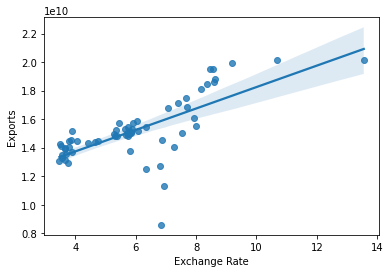

In [29]:
x1=df['Exchange Rate']
y1=df['Exports']
sns.regplot(x1,y1)

In [30]:
df.shape

(60, 4)

In [33]:
df

,Inflation Rate,Exchange Rate,Unemployment Rate,Exports
Month,,,,
02-2017,10.13,3.750432,12.0,1.294592e+10
03-2017,11.29,3.666670,11.9,1.316552e+10
04-2017,11.87,3.670448,11.9,1.399765e+10
05-2017,11.72,3.652805,11.6,1.389527e+10
06-2017,10.90,3.567852,11.1,1.351029e+10
07-2017,9.79,3.519655,11.0,1.408426e+10
08-2017,10.68,3.563338,10.6,1.326084e+10
09-2017,11.20,3.508952,10.5,1.423578e+10
10-2017,11.90,3.473876,10.3,1.306653e+10
